# Developing Gaussian Naïve Bayes Classifier

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import graphviz
%matplotlib inline
from sklearn import tree

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics

In [2]:
df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.isnull().value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI    DiabetesPedigreeFunction  Age    Outcome
False        False    False          False          False    False  False                     False  False      768
dtype: int64

In [8]:
# Generate feature matrix and labels array
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

### Model Preparation

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state=42)

In [10]:
# Develop the Gaussian Naive bayes Classifier with Default Hyperparameters
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [11]:
# Actual Values and Predicted Values
y_predgnb = gnb.predict(X_test)
pd.DataFrame({"Actual":y_test, "Predicted":y_predgnb})

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,1
...,...,...
355,1,1
534,0,0
344,0,0
296,1,1


### Evaluate the Gaussian Naïve Bayes Classifier
To understand how the GaussianNB classifier performs, we must compare actual classes 
and predicted classes side by side.

In [12]:
# Confusion Matrix
cmatgnb = pd.DataFrame(confusion_matrix(y_test,y_predgnb), 
                       index=["Actual: No","Actual: Yes"],
                       columns=("Predicted: No","Predicted: Yes"))

cmatgnb

,Predicted: No,Predicted: Yes
Actual: No,79,20
Actual: Yes,16,39


In [13]:
# Classification Report
creportgnb = pd.DataFrame(classification_report(y_test,y_predgnb,
                                                output_dict=True)).transpose()

creportgnb

,precision,recall,f1-score,support
0,0.831579,0.797980,0.814433,99.000000
1,0.661017,0.709091,0.684211,55.000000
accuracy,0.766234,0.766234,0.766234,0.766234
macro avg,0.746298,0.753535,0.749322,154.000000
weighted avg,0.770664,0.766234,0.767925,154.000000


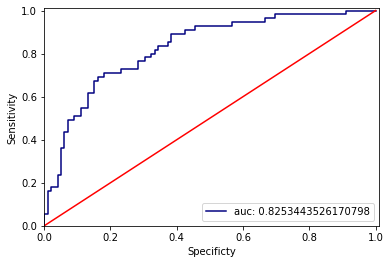

In [14]:
# ROC Curve
y_predgnb_proba = gnb.predict_proba(X_test)[::,1]
fprgnb, tprgnb, _ = roc_curve(y_test,y_predgnb_proba)
aucgnb = metrics.roc_auc_score(y_test, y_predgnb_proba)
plt.plot(fprgnb, tprgnb, label="auc: "+ str(aucgnb), color="navy")
plt.plot([0,1],[0,1],color="red")
plt.xlim([0.00,1.01])
plt.ylim([0.00,1.01])
plt.xlabel("Specificty")
plt.ylabel("Sensitivity")
plt.legend(loc=4)
plt.show()

### Precision Recall Curve
The classification report tells us that class 0 has an enormous number of data points (the 
data is imbalanced). I therefor, must focus more on precision and recall.

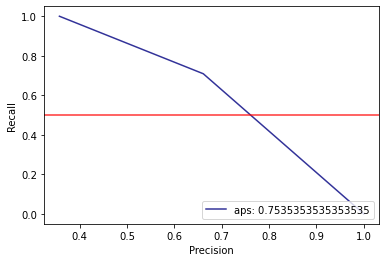

In [15]:
# Precision-Recall Curve
precisiongnb, recallgnb, thresholdgnb = precision_recall_curve(y_test,y_predgnb)
apsgnb = roc_auc_score(y_test,y_predgnb)
plt.plot(precisiongnb, recallgnb, label="aps: " + str(apsgnb), color="navy", alpha=0.8)
plt.axhline(y=0.5,color="red",alpha=0.8)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc=4)
plt.show()

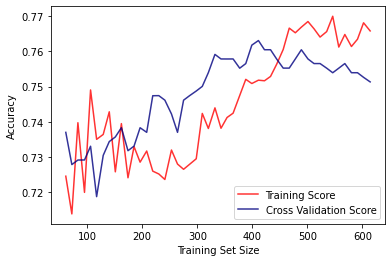

In [16]:
# Learning Curve
trainsizegnb, trainscoregnb, testscoregnb = learning_curve(gnb, x, y, 
                                                           cv=5,
                                                           n_jobs=5,
                                                           train_sizes=np.linspace(0.1,1.0,50))

trainscoregnb_mean = np.mean(trainscoregnb,axis=1)
testscoregnb_mean = np.mean(testscoregnb,axis=1)
plt.plot(trainsizegnb,trainscoregnb_mean,color="red", label="Training Score", alpha=0.8)
plt.plot(trainsizegnb,testscoregnb_mean,color="navy", label="Cross Validation Score", alpha=0.8)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc=4)
plt.show()